In [1]:
import os
import torch
import cv2

In [2]:
ucf_data_dir = "../resources/UCF-101/data/"
ucf_train_data_preprocessed_dir = "../resources/UCF-101/data_preprocessed/train"
ucf_test_data_preprocessed_dir = "../resources/UCF-101/data_preprocessed/test"
frames_per_clip = 5
train_test_split = 0.7

In [3]:
import torchvision.transforms as transforms
import torch.nn as nn

tfs = transforms.Compose([
    transforms.Lambda(lambda x: x / 255.),
    transforms.Lambda(lambda x: x.permute(0, 3, 1, 2)),
    transforms.Lambda(lambda x: nn.functional.interpolate(x, (240, 320))),
])

BalanceBeam v_BalanceBeam_g02_c02.avi


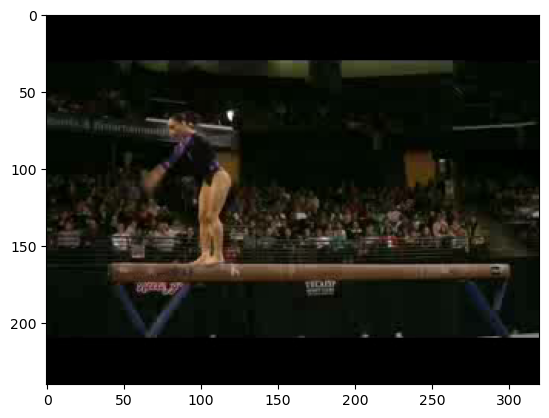

In [23]:
import tqdm
import matplotlib.pyplot as plt
split_class_number = len(os.listdir(ucf_data_dir)) * train_test_split

train = True
for idx, class_folder in enumerate(os.listdir(ucf_data_dir)):
    non_folder_count = 0
    if class_folder == '.DS_Store':
        non_folder_count += 1
        continue
    
    if (idx + non_folder_count) > split_class_number:
        train = False

    class_path = os.path.join(ucf_data_dir, class_folder)
    preprocessed_class = os.path.join(ucf_train_data_preprocessed_dir if train else ucf_test_data_preprocessed_dir, class_folder)
    os.makedirs(preprocessed_class, exist_ok=True)

    for video_file in os.listdir(class_path):
        video_path = os.path.join(class_path, video_file)
        video_capture = cv2.VideoCapture(video_path)
        frames = []
        frame_count = 0
        
        while frame_count < frames_per_clip:
            return_value, frame = video_capture.read()
            if not return_value:
                break
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(torch.tensor(frame_rgb, dtype=torch.float32))
            frame_count += 1
            break
        print(class_folder, video_file)
        cp = frames[0].to(dtype=torch.int)
        plt.imshow(cp)
        processed_file_path = os.path.join(preprocessed_class, video_file.replace('avi', 'pt'))
        # torch.save(frames, processed_file_path)
        break
    break